In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
altersgruppe_df = pd.read_csv('./CovidFaelle_Altersgruppe.csv', delimiter=';')
altersgruppe_df = altersgruppe_df.set_index('Time')
altersgruppe_df.index = pd.to_datetime(altersgruppe_df.index, format='%d.%m.%Y %H:%M:%S')

In [3]:
temp_df = altersgruppe_df.last('1D')
temp_df = temp_df[(temp_df['Bundesland'] == 'Österreich')]
temp_df = temp_df.groupby(by='Altersgruppe').sum()
temp_df = temp_df[['AnzEinwohner', 'AnzahlTot']]

In [4]:
under_35_df = temp_df[
    (temp_df.index == '<5') | (temp_df.index == '5-14') | (temp_df.index == '15-24') | (temp_df.index == '25-34')]
under_35_df = under_35_df.sum()
under_35_df = under_35_df.to_frame().transpose()
under_35_df['Altersgruppe'] = '<35'

In [5]:
final_df = temp_df.reset_index().merge(under_35_df, how='outer').set_index('Altersgruppe')
final_df = final_df.drop(['<5', '5-14', '15-24', '25-34'], axis='index')
final_df = final_df.reindex(['<35', '35-44', '45-54', '55-64', '65-74', '75-84', '>84'])

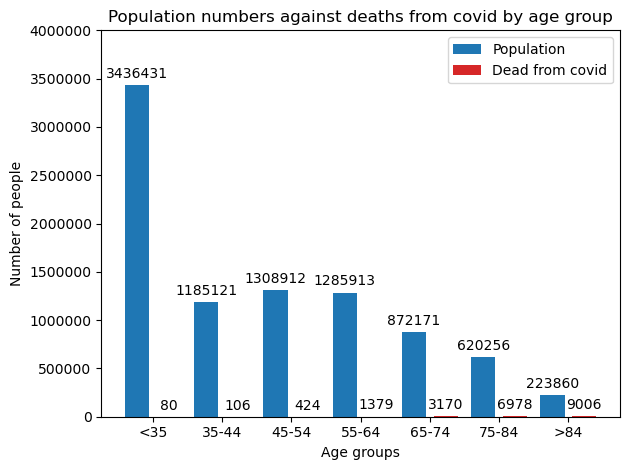

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

width = 0.23
x = np.arange(len(final_df.index))

bar1 = ax.bar(x - width, height=final_df['AnzEinwohner'], width=0.35, label='Population', color='#1f77b4')
bar2 = ax.bar(x + width, height=final_df['AnzahlTot'], width=0.35, label='Dead from covid', color='#d62728')

plt.xticks(x, final_df.index)
plt.yticks(np.arange(0, 4000001, 500000))
plt.ylabel('Number of people')
plt.xlabel('Age groups')

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

ax.bar_label(bar1, padding=3, fmt='%d')
ax.bar_label(bar2, padding=3)

plt.legend()
plt.title('Population numbers against deaths from covid by age group')

fig.tight_layout()

plt.savefig('plot_white_hat_andeol.png', dpi=1200, format='png', bbox_inches='tight')

plt.show()